# Lesson: Regression - MODELING
<a href = "https://www.canva.com/design/DAFfKJ-tBmY/MaBo1RIoh_CA5DcvWNox2Q/view?utm_content=DAFfKJ-tBmY&utm_campaign=designshare&utm_medium=link&utm_source=publishsharelink"> 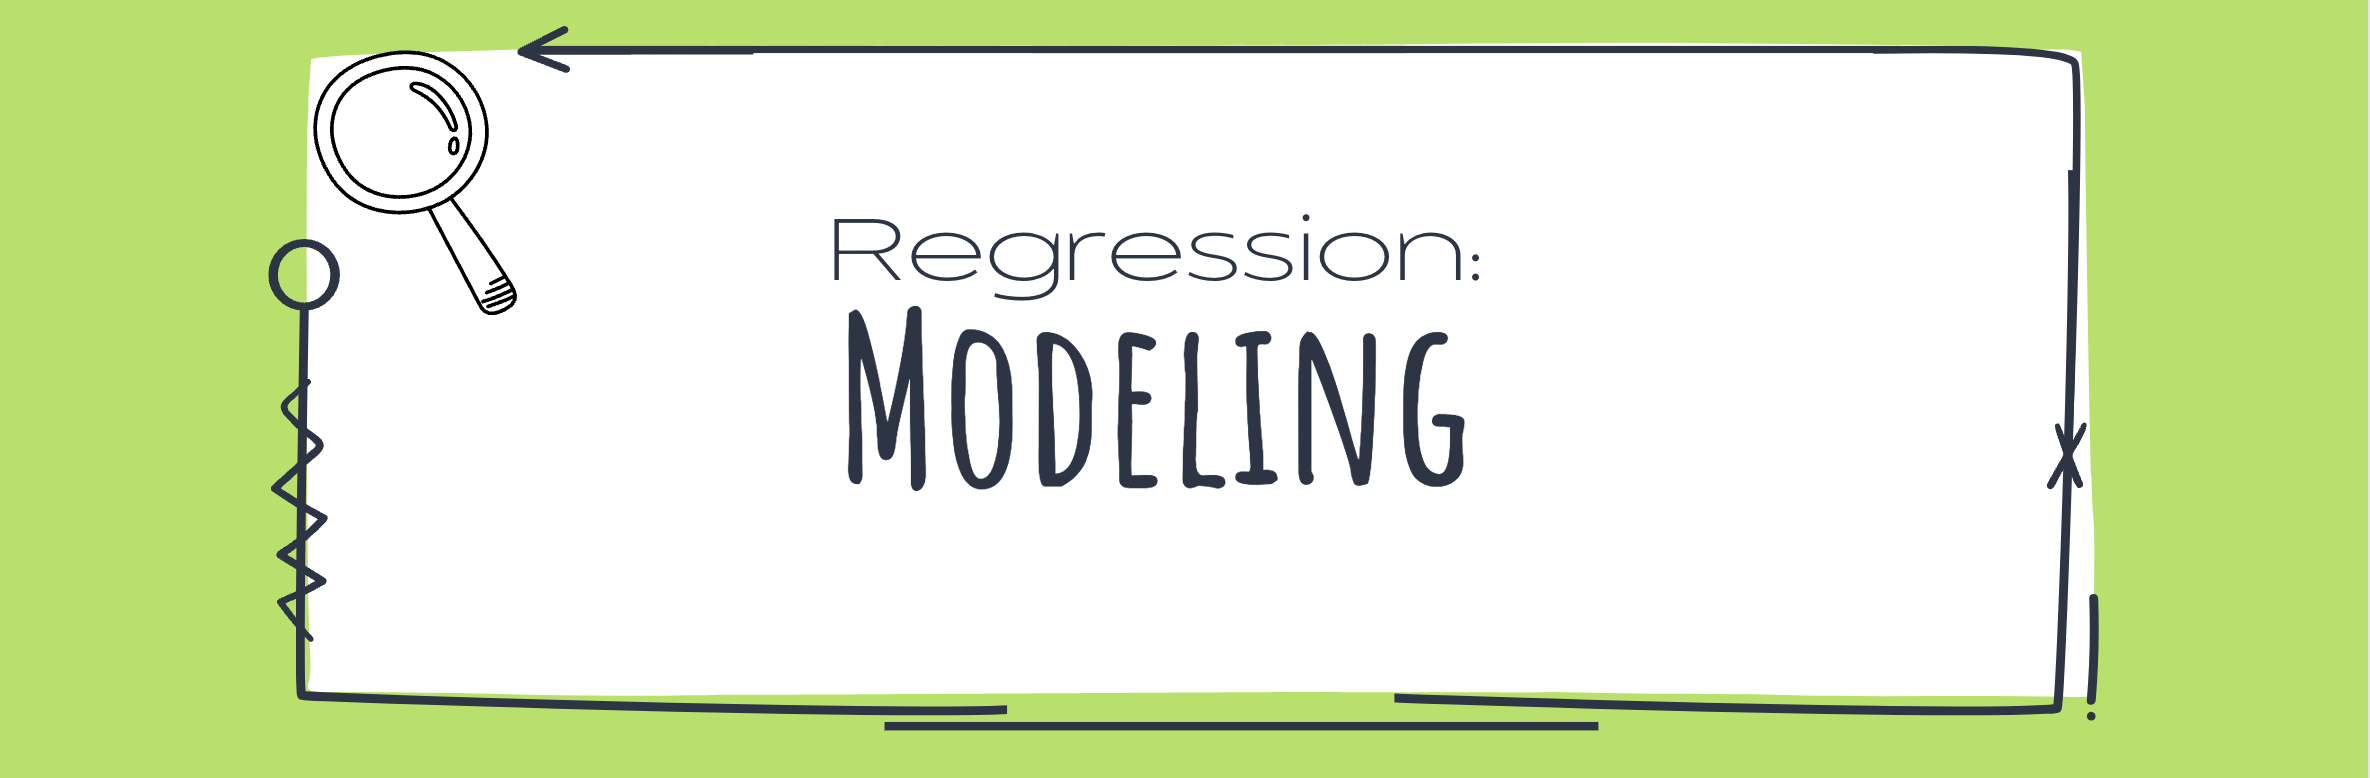</a>

# Prepare Data for Modeling

### Pipeline

Acquire
- get the data into pandas
- look at it
    - describe, info, head, shape
- understand what your data means
    - know what each column is
    - know what your target variable is

Wrangle
- clean the data
    - handle nulls
    - handle outliers
    - correct datatypes
- univariate analysis (looking at only one variable)
- encode variables -- Preprocessing
- split into train, validate/, test
- scale data (after train/validate/test split) -- Preprocessing
- document how your changing the data

Explore 
- use only train data!
    - use unscaled data
- establish relationships using multivariate analysis 
    - hypothesize
    - visualize
    - statistize
    - summarize
- feature engineering
    - when using RFE, use scaled data

Model 
- use scaled/encoded data
- split into X_variables and y_variables
    - X_train, y_train, X_validate, y_validate, X_test, y_test
- build models
    - make the thing 
    - fit the thing (on train)
    - use the thing 
- evaluate models on train and validate
- pick the best model and evaluate it on test

# **Wrangle**

1. Acquired data from student-mat.csv. 

2. Create dummy vars

3. Split data 

4. Scale data

wrangle.wrangle_student_math(path) returns the following: 

| Object Returned | Description | Purpose                          |
|:-------------------|:--------------------------------|:----------------------------------------------------|
| 1. df | **Dataframe**, **Feature** and **target** variables, **Unscaled**, Dummy vars **with** original categorical vars | New features, additional cleaning needed, etc. |
| 2. X_train_exp | **Dataframe**, **Feature** variables only, **Unscaled**, Dummy vars **with** original categorical vars | Exploration & analysis     |
| 3. X_train | **Dataframe**, **Feature** variables only, **Scaled**, Dummy vars **without** original categorical vars | Feature selection, fit models, make predictions |
| 4. y_train | **Series**, **Target** variable only, **Unscaled** | Feature selection, evaluate model predictions |
| 5. X_validate | **Dataframe**, **Features** variables only, **Scaled**, Dummy vars **without** original categorical vars | Make predictions using top models |
| 6. y_validate | **Series**, **Target** variable only, **Unscaled** | Evaluate model predictions made from X_validate to assess overfitting | 
| 7. X_test | **Dataframe**, **Features** variables only, **Scaled**, Dummy vars **without** original categorical vars | Make predictions using best model|
| 8. y_test | **Series**, **Target** variable only, **Unscaled** | Evaluate model predictions made from X_test to estimate future performance on new data |

In [1]:
import pandas as pd
import numpy as np
import wrangle
import matplotlib.pyplot as plt

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
path='https://gist.githubusercontent.com/ryanorsinger/55ccfd2f7820af169baea5aad3a9c60d/raw/da6c5a33307ed7ee207bd119d3361062a1d1c07e/student-mat.csv'

In [4]:
df, \
X_train_exp, \
X_train, \
y_train, \
X_validate, \
y_validate, \
X_test, \
y_test = wrangle.wrangle_student_math(path)

In [5]:
# Check how many observations and features we have in each dataframe

print(f"""Train shape: {X_train.shape}
Validate shape: {X_validate.shape}
Test shape: {X_test.shape}
""")

Train shape: (221, 15)
Validate shape: (95, 15)
Test shape: (79, 15)



In [6]:
# check the X_train head:
X_train.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
142,0.000000,1.00,1.00,0.000000,0.666667,0.000000,0.75,0.25,0.25,0.00,0.00,1.00,0.035714,0.357143,0.578947
326,0.333333,0.75,0.75,0.000000,0.000000,0.000000,0.75,0.50,1.00,0.50,1.00,1.00,0.053571,0.714286,0.789474
88,0.166667,0.50,0.50,0.333333,0.333333,0.333333,0.75,0.75,0.25,0.00,0.00,0.50,0.214286,0.500000,0.526316
118,0.333333,0.25,0.75,0.666667,0.333333,0.333333,1.00,0.25,0.75,0.00,0.75,1.00,0.357143,0.357143,0.368421
312,0.666667,0.25,0.50,0.000000,0.333333,0.333333,0.75,1.00,0.25,0.25,0.25,0.75,0.053571,0.642857,0.578947


In [7]:
# and y_train head:
y_train.head(10)

142    11
326    16
88     10
118     8
312    11
249    15
129    18
333     0
104    18
253     8
Name: G3, dtype: int64

### Target Variable/y

This helps us determine which type of algorithm we may want to use. 

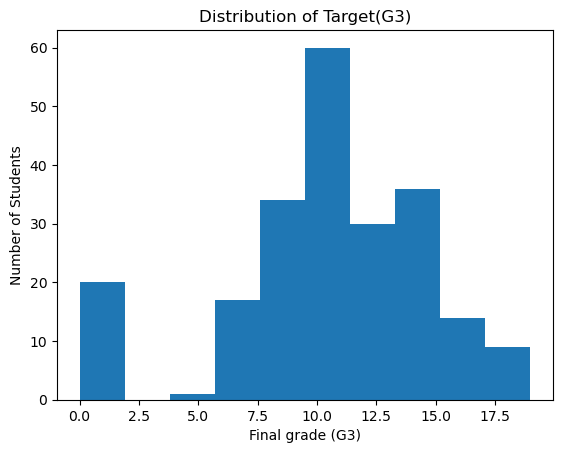

In [9]:
plt.hist(y_train)
plt.title("Distribution of Target(G3)")
plt.xlabel('Final grade (G3)')
plt.ylabel("Number of Students")
plt.show()

<div class="alert alert-info" role="alert">
Take Aways:
    
- More or less normal distribution

</div>

# Modeling

## Baseline

About the initial baseline: 

> Before we begin making models, we need to know how well we can estimate (predict) the final grade (G3) without using any features. 
>
>This is often done by predicting every observation's target value to be the mean or the median. 
>
>E.g. we could predict every student's final grade to be the mean final grade of all the students in our training sample. 
>
>We will try both the mean and the median, see which performs best, and set that evaluation metric value as our baseline performance to beat. 

In [10]:
y_train.mean()

10.524886877828054

In [11]:
y_train.median()

11.0

1. Predict all final grades to be 10.52, which is equal to the mean of G3 for the training sample. Store in `y_train['G3_pred_mean']`. 

2. Predict all final grades to be 11, which is equal to the median of G3 for the training sample. Store in `y_train['G3_pred_median']`.  

3. Compute the RMSE comparing actual final grade (G3) to G3_pred_mean. 

4. Compute the RMSE comparing actual final grade (G3) to G3_pred_median. 

In [12]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

In [13]:
# 1. Predict G3_pred_mean
G3_pred_mean = y_train.G3.mean()
y_train['G3_pred_mean'] = G3_pred_mean
y_validate['G3_pred_mean'] = G3_pred_mean

In [14]:
# 2. compute G3_pred_median
G3_pred_median = y_train.G3.median()
y_train['G3_pred_median'] = G3_pred_median
y_validate['G3_pred_median'] = G3_pred_median

In [16]:
# 3. RMSE of G3_pred_mean
rmse_train_mu = mean_squared_error(y_train.G3, y_train.G3_pred_mean) ** (.5)

rmse_validate_mu = mean_squared_error(y_validate.G3, y_validate.G3_pred_mean) ** (.5)

print(f"""RMSE using Mean\nTrain/In-Sample: {round(rmse_train_mu, 2)} 
Validate/Out-of-Sample: {round(rmse_validate_mu, 2)}""")

RMSE using Mean
Train/In-Sample: 4.5 
Validate/Out-of-Sample: 4.58


In [17]:
# 4. RMSE of G3_pred_median
rmse_train_med = mean_squared_error(y_train.G3, y_train.G3_pred_median) **(.5)
rmse_validate_med = mean_squared_error(y_validate.G3, y_validate.G3_pred_median) **(.5)

print(f"""RMSE using Median\nTrain/In-Sample: {round(rmse_train_med, 2)} 
Validate/Out-of-Sample: {round(rmse_validate_med, 2)}""")

RMSE using Median
Train/In-Sample: 4.52 
Validate/Out-of-Sample: 4.69



#### Addendum/Note:
we will incrementally build 
a dataframe for comparison of 
our metrics for model selection
for ease of reflection


In [18]:
y_train.head()

,G3,G3_pred_mean,G3_pred_median
142,11,10.524887,11.0
326,16,10.524887,11.0
88,10,10.524887,11.0
118,8,10.524887,11.0
312,11,10.524887,11.0


In [19]:
# Let's house our metrics in a df to later compare
metric_df = pd.DataFrame(data = [
        {
            "model": "mean_baseline",
            "RMSE_train": rmse_train_mu,
            "RMSE_validate":rmse_validate_mu,
            "R2_validate": explained_variance_score(y_validate.G3, y_validate.G3_pred_mean)
        }
])


In [20]:
metric_df

,model,RMSE_train,RMSE_validate,R2_validate
0,mean_baseline,4.498926,4.578917,2.220446e-16


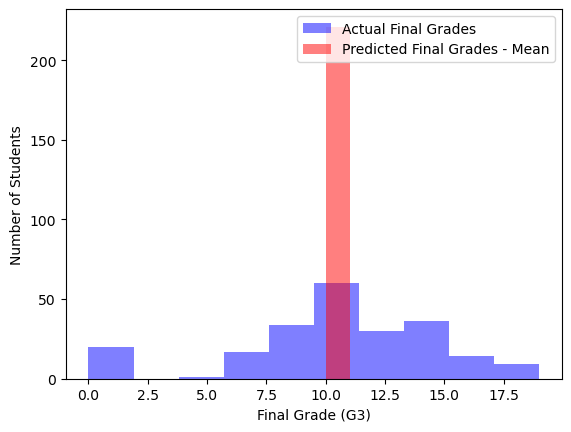

In [22]:
# plot to visualize actual vs predicted. 

plt.hist(y_train.G3, color='blue', alpha=.5, label="Actual Final Grades")
plt.hist(y_train.G3_pred_mean, bins=1, color='red', alpha=.5,  label="Predicted Final Grades - Mean")
#plt.hist(y_train.G3_pred_median, bins=1, color='orange', alpha=.5, label="Predicted Final Grades - Median")
plt.xlabel("Final Grade (G3)")
plt.ylabel("Number of Students")
plt.legend()
plt.show()

___ 
## LinearRegression (OLS)

1. Fit the model using `X_train` (scaled) and the labels from `y_train`. 

2. Predict final grade `G3` for students in training sample using our model (lm). 

3. Evaluate using RMSE

4. **Repeat** predictions and evaluation for `validation`. 

5. **Compare** RMSE `train` vs. `validation`. 
    - Overfitting? 

In [ ]:
# MAKE THE THING: create the model object


#1. FIT THE THING: fit the model to training data


#2. USE THE THING: make a prediction


#3. Evaluate: RMSE


In [ ]:
#4. REPEAT STEPS 2-3

# predict validate


# evaluate: RMSE


print(f"""RMSE for OLS using LinearRegression
Training/In-Sample:  {rmse_train} 
Validation/Out-of-Sample: {rmse_validate}""")

In [ ]:
#Append this to the metric_df



___
## LassoLars

1. Fit the model using `X_train` (scaled) and the labels from `y_train`. 

2. Predict final grade `G3` for students in training sample using our model (lars). 

3. Evaluate using RMSE

4. **Repeat** predictions and evaluation for `validation`. 

5. **Compare** RMSE `train` vs. `validation`. Overfitting? 

In [ ]:
# MAKE THE THING: create the model object


#1. FIT THE THING: fit the model to training data
# We must specify the column in y_train, since we have converted it to a dataframe from a series!


#2. USE THE THING: make a prediction


#3. Evaluate: RMSE


#4. REPEAT STEPS 2-3

# predict validate


# evaluate: RMSE


print(f"""RMSE for Lasso + Lars
_____________________
Training/In-Sample: {rmse_train}, 
Validation/Out-of-Sample:  {rmse_validate}
Difference:  {rmse_validate - rmse_train}""")

In [ ]:
#Append


<div style="border: 1px solid black; border-radius: 3px; background: green; padding: .5em 1em;">
    <p style="font-size: 1.3em; font-weight: bold">Mini Exercise</p>
    <ol>
        <li>Use a different <code>alpha</code> with the lasso model to try the fit with a different penalty based on the above code.</li>
        <li>What do you notice about the difference in rmse between train and validate sets?</li>
    </ol>
</div>

In [ ]:
# MAKE THE THING: create the model object


#1. FIT THE THING: fit the model to training data
# We must specify the column in y_train, since we have converted it to a dataframe from a series!


#2. USE THE THING: make a prediction


#3. Evaluate: RMSE


#4. REPEAT STEPS 2-3

# predict validate


# evaluate: RMSE


print(f"""RMSE for Lasso + Lars
_____________________
Training/In-Sample: {rmse_train}, 
Validation/Out-of-Sample:  {rmse_validate}
Difference:  {rmse_validate - rmse_train}""")

___
## TweedieRegressor (GLM:Generalized Linear Model)

The most flexible regression algorithm, the GLM allows for different distributions, beyond just the Normal Distribution for OLS (and other models based on OLS, like LASSO). We will use the `TweedieRegressor` method to create a GLM using sklearn.

> `sklearn.linear_model.TweedieRegressor(power=0, alpha=1.0)`

        power = 0: Normal Distribution
        power = 1: Poisson Distribution
        power = (1,2): Compound Distribution
        power = 2: Gamma Distribution
        power = 3: Inverse Gaussian Distribution

1. Fit the model using `X_train` (scaled) and the labels from `y_train`. 

2. Predict final grade `G3` for students in training sample using our model (GLM). 

3. Evaluate using RMSE

4. **Repeat** predictions and evaluation for `validation`. 

5. **Compare** RMSE `train` vs. `validation`. Overfitting? 





In [ ]:
# MAKE THE THING: create the model object


#1. FIT THE THING: fit the model to training data
# We must specify the column in y_train, since we have converted it to a dataframe from a series!


#2. USE THE THING: make a prediction


#3. Evaluate: RMSE


#4. REPEAT STEPS 2-3

# predict validate


# evaluate: RMSE


print(f"""RMSE for GLM using Tweedie, power=0 & alpha=0
_____________________
Training/In-Sample: {rmse_train}, 
Validation/Out-of-Sample:  {rmse_validate}
Difference:  {rmse_validate - rmse_train}""")

<div style="border: 1px solid black; border-radius: 3px; background: green; padding: .5em 1em;">
    <p style="font-size: 1.3em; font-weight: bold">Mini Exercise</p>
    <ol>
        <li><code>Use a different power</code> with the generalized linear model to try the fit of a different distribution based on the above code.</li>
        <li>Does it seem to perform better or worse than the first pick? Could you see why it may change? What does "power" mean here?</li>
    </ol>
</div>

In [ ]:
#Append


___
## Polynomial Regression

Using sklearn.preprocessing.PolynommialFeatures() + sklearn.linear_model.LinearRegression()

1. **Create** the new features, based on value indicated for **degree** for *train*, *validate* & *test*. 
- MAKE the thing
- FIT the thing
- USE (transform) the thing

2. Fit the Linear Regression model

3. Predict using the transformed (squared or cubed, e.g.) features 

4. Evaluate using RMSE

5. **Repeat** predictions and evaluation for `validation`.

6. **Compare** RMSE `train` vs. `validation`. Overfitting?

### **Polynomial Features**
What does a polynomial look like when graphed on a coordinate plane? Well it depends on
- The intercept
- The coefficients

Interact with the following <a href="https://www.desmos.com/calculator/m44gdvrrhb"> graphing calculator</a>


In [ ]:
#1. Create the polynomial features to get a new set of features


#1. Fit and transform X_train_scaled


#1. Transform X_validate_scaled & X_test_scaled 




#### **LinearRegression**

In [ ]:
#2.1 MAKE THE THING: create the model object


#2.2 FIT THE THING: fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 


#3. USE THE THING: predict train


#4. Evaluate: rmse


#4. REPEAT STEPS 3-4

# predict validate


# evaluate: rmse


print(f"""RMSE for Polynomial Model, degrees=2
_____________________________________________
Training/In-Sample:  {rmse_train} 
Validation/Out-of-Sample:  {rmse_validate}""")

In [ ]:
#Append


___
# Evaluate

#### **Plotting Actual vs. Predicted Values**

<a href = "https://ds.codeup.com/regression/model/#evaluate">Evaluation Plot Code from Codeup Curriculum Text</a>

In [ ]:
plt.figure(figsize=(16,8))
#actual vs mean
plt.plot(y_validate.G3, y_validate.G3_pred_mean, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))

#actual vs. actual
plt.plot(y_validate.G3, y_validate.G3, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

#actual vs. LinearReg model
plt.scatter(y_validate.G3, y_validate.G3_pred_lm, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
#actual vs. LassoLars model
plt.scatter(y_validate.G3, y_validate.G3_pred_lars, 
            alpha=.5, color="purple", s=100, label="Model: Lasso Lars")
#actual vs. Tweedie/GenLinModel
plt.scatter(y_validate.G3, y_validate.G3_pred_glm, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
#actual vs. PolynomReg/Quadratic
plt.scatter(y_validate.G3, y_validate.G3_pred_lm2, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Final Grade")
plt.ylabel("Predicted Final Grade")
plt.title("Where are predictions more extreme? More modest?")
plt.show()

##### **Residual Plots: Plotting the Errors in Predictions**

In [ ]:
# y_validate.head()
plt.figure(figsize=(16,8))

plt.axhline(label="No Error")


plt.scatter(y_validate.G3, y_validate.G3_pred_lm - y_validate.G3 , 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.G3, y_validate.G3_pred_lars - y_validate.G3 , 
            alpha=.5, color="purple", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.G3, y_validate.G3_pred_glm - y_validate.G3, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.G3, y_validate.G3_pred_lm2 - y_validate.G3, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")

plt.legend(loc=4)
plt.xlabel("Actual Final Grade")
plt.ylabel("Residual/Error: Predicted Grade - Actual Grade")
plt.title("Do the size of errors change as the actual value changes?")
plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

##### **Histograms**

In [ ]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))

plt.hist(y_validate.G3, color='blue', alpha=.5, label="Actual Final Grades")
plt.hist(y_validate.G3_pred_lm, color='red', alpha=.5, label="Model: LinearRegression")
plt.hist(y_validate.G3_pred_lm, color='purple', alpha=.5, label="Model: Lasso Lars")
plt.hist(y_validate.G3_pred_glm, color='yellow', alpha=.5, label="Model: TweedieRegressor")
plt.hist(y_validate.G3_pred_lm2, color='green', alpha=.5, label="Model 2nd degree Polynomial")

plt.xlabel("Final Grade (G3)")
plt.ylabel("Number of Students")
plt.title("Comparing the Distribution of Actual Grades to Distributions of Predicted Grades for the Top Models")
plt.legend()
plt.show()

# **Model Selection & Out-of-Sample Evaluation**

Model selected: lars (using Lasso lars with alpha = 0.01)

In [ ]:
# Convert y_test Series to a df


# USE THE THING: predict on test


# Evaluate: rmse


print(f"""RMSE for OLS Model using LinearRegression
_____________________________________________      
Out-of-Sample Performance: {rmse_test}
Baseline: {y_train.G3.mean()}""")